In [248]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [249]:
df5=df.copy()

In [250]:
df5.Undergrad.replace(('NO','YES'),(0,1),inplace=True)

In [251]:
df5=df5.rename({'Marital.Status':'ms'},axis=1)

In [253]:
df5.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO


In [254]:
df5.ms.replace(('Single','Divorced','Married'),(0,1,2),inplace=True)

In [255]:
df5.Urban.replace(('NO','YES'),(0,1),inplace=True)

In [256]:
df5.head()

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,1,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,2,81002,27533,28,0


In [257]:
df5.dtypes

Undergrad          int64
ms                 int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
dtype: object

#Taxable.Income<30000= Risky
#Taxable.Income>30000=Good

In [258]:
df5.loc[df5['Taxable.Income']<30000,'Taxable.Income']=1

In [259]:
df5.head(40)

,Undergrad,ms,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,1,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,2,81002,27533,28,0
5,0,1,33329,116382,0,0
6,0,1,83357,80890,8,1
7,1,0,62774,131253,3,1
8,0,0,83519,102481,12,1
9,1,1,98152,155482,4,1


In [260]:
df5.loc[df5['Taxable.Income']>30000,'Taxable.Income']=0

In [261]:
col=list(df5.columns)
col

['Undergrad',
 'ms',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [262]:
df5=df5[col[0:2]+col[3:6]+[col[2]]]
df5.head()

,Undergrad,ms,City.Population,Work.Experience,Urban,Taxable.Income
0,0,0,50047,10,1,0
1,1,1,134075,18,1,0
2,0,2,160205,30,1,0
3,1,0,193264,15,1,0
4,0,2,27533,28,0,0


In [263]:
df5=df5.drop(['City.Population'],axis=1)

In [264]:
df5.head(40)

,Undergrad,ms,Work.Experience,Urban,Taxable.Income
0,0,0,10,1,0
1,1,1,18,1,0
2,0,2,30,1,0
3,1,0,15,1,0
4,0,2,28,0,0
5,0,1,0,0,0
6,0,1,8,1,0
7,1,0,3,1,0
8,0,0,12,1,0
9,1,1,4,1,0


In [291]:
X=df5.drop(['Taxable.Income'],axis=1)
X

,Undergrad,ms,Work.Experience,Urban
0,0,0,10,1
1,1,1,18,1
2,0,2,30,1
3,1,0,15,1
4,0,2,28,0
...,...,...,...,...
595,1,1,7,1
596,1,1,2,1
597,0,1,0,1
598,1,2,17,0


In [266]:
y=df5['Taxable.Income']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [267]:
y.head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
Name: Taxable.Income, dtype: int64

In [268]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [269]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 4), (120, 4), (480,), (120,))

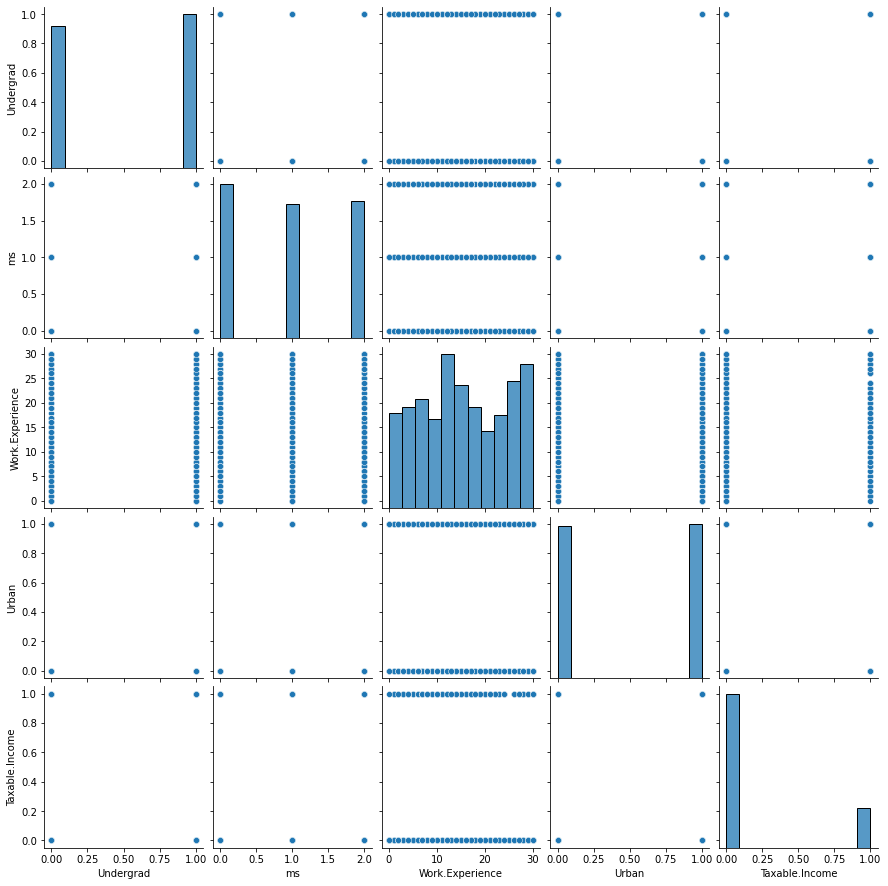

In [270]:
import seaborn as sns
sns.pairplot(df5)

In [271]:
#DecisionTreeClassifier

In [272]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [273]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [274]:
pred=model_gini.predict(X_test)

In [275]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [276]:
model_gini.score(X_test,y_test)

0.7916666666666666

In [277]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

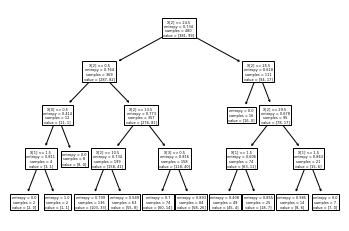

In [278]:
from sklearn import tree
tree.plot_tree(model);

In [279]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [280]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
pd.crosstab(y_test,preds)

col_0,0
Taxable.Income,
0,95
1,25


In [282]:
np.mean(preds==y_test)

0.7916666666666666

In [283]:
#Feature Seletion

In [284]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [285]:
array=df5.values
x=array[:,0:4]
x



array([[ 0,  0, 10,  1],
       [ 1,  1, 18,  1],
       [ 0,  2, 30,  1],
       ...,
       [ 0,  1,  0,  1],
       [ 1,  2, 17,  0],
       [ 0,  1, 16,  0]], dtype=int64)

In [286]:
Y=array[:,4:]
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [287]:

kfold=KFold(n_splits=11,random_state=7)
cart=DecisionTreeClassifier()
num_trees=90

model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)

results=cross_val_score(model,x,Y,cv=kfold)

x1=results.mean()
x1

0.7101928374655647

In [288]:
from sklearn.ensemble import AdaBoostClassifier

array=df5.values
x=array[:,0:4]
Y=array[:,4:]

kfold=KFold(n_splits=14,random_state=7)

model=AdaBoostClassifier(n_estimators=20,random_state=7)

results=cross_val_score(model,x,Y,cv=kfold)

results.mean()

0.7935848758107894

In [289]:
#Stacking Ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

x=X
Y=y


kfold=KFold(n_splits=10,random_state=7)

#create the sub models
estimators=[]

model1=LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))

model2=DecisionTreeClassifier(max_depth=3)
estimators.append(('gini',model2))

model3=SVC()
estimators.append(('svm',model3))

ensemble=VotingClassifier(estimators)

results=cross_val_score(ensemble,X,Y,cv=kfold)

results.mean()

0.7933333333333332